# Data Collection
This notebook collects the data that is used in my project. This is done by querying [DBpedia](https://wiki.dbpedia.org/) with SPARQL.

(I am new to SPARQL so queries might not be optimal)

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON, XML, N3, RDF
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

Given a SPARQL query and a label (i.e *Person*, *Animal*, *City* etc.) the function getData will query DBpedia, extract the abstract and label the abstracts with the given label. Returns a pandas dataframe consisting of the URL to the dbpedia page, the abstract, and the correct class label.

In [2]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setReturnFormat(JSON)
prefix = """PREFIX owl: <http://www.w3.org/2002/07/owl#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
    PREFIX dc: <http://purl.org/dc/elements/1.1/>
    PREFIX : <http://dbpedia.org/resource/>
    PREFIX dbpedia2: <http://dbpedia.org/property/>
    PREFIX dbpedia: <http://dbpedia.org/>
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>"""
def getData(query,db_type, label):
    sparql.setQuery(prefix+query)
    results = sparql.query().convert()
    res = pd.DataFrame.from_dict(results["results"]["bindings"])
    df = pd.DataFrame()
    df['page'] = res[db_type].apply(lambda text: text['value'])
    df['abstract'] = res['abstract'].apply(lambda text: text['value'])
    df['label'] = label
    return df

Building a bunch of queries to compile a dataset consisting of abstracts of different classes.

In [3]:
persons = getData("""SELECT ?person, ?abstract WHERE {
    ?person dbo:abstract ?abstract .
    ?person a dbo:Person .
    FILTER (lang(?abstract) = 'en')
}
""", 'person','Person')
cities = getData("""SELECT ?city, ?abstract WHERE {
    ?city dbo:abstract ?abstract .
    ?city a dbo:City .
    ?city dbo:populationTotal ?pop .
    FILTER (lang(?abstract) = 'en' && ?pop > 1000)
}
""", 'city','City')
mammals = getData("""SELECT ?animal, ?abstract WHERE {
    ?animal dbo:abstract ?abstract .
    ?animal a dbo:Mammal .
    FILTER (lang(?abstract) = 'en')
}
""",'animal', 'Mammal')
fish = getData("""SELECT ?animal, ?abstract WHERE {
    ?animal dbo:abstract ?abstract .
    ?animal a dbo:Fish .
    FILTER (lang(?abstract) = 'en')
}
""",'animal', 'Fish')
birds = getData("""SELECT ?animal, ?abstract WHERE {
    ?animal dbo:abstract ?abstract .
    ?animal a dbo:Bird .
    FILTER (lang(?abstract) = 'en')
}
""",'animal', 'Bird')
countries = getData("""SELECT ?country, ?abstract WHERE {
    ?country dbo:abstract ?abstract .
    ?country dbo:populationTotal ?pop .
    ?country a dbo:Country .
    FILTER (lang(?abstract) = 'en' && ?pop > 10000)
}
""",'country', 'Country')
companies = getData("""SELECT ?company, ?abstract WHERE {
    ?company dbo:abstract ?abstract .
    ?company a dbo:Company .
    ?company dbo:numberOfEmployees ?employees .
    FILTER (lang(?abstract) = 'en' && ?employees > 1000)
}
""",'company', 'Company')
books = getData("""SELECT ?book, ?abstract WHERE {
    ?book dbo:abstract ?abstract .
    ?book a dbo:Book .
    ?book dbo:isbn ?isbn .
    ?book dbo:numberOfPages ?pages .
    FILTER (lang(?abstract) = 'en' && ?pages>400)
}
""",'book', 'Book')
universities = getData("""SELECT ?university, ?abstract WHERE {
    ?university dbo:abstract ?abstract .
    ?university a dbo:University .
    ?university dbo:numberOfStudents ?students
    FILTER (lang(?abstract) = 'en' && ?students>1000)
}
""",'university', 'University')
planets = getData("""SELECT ?planet, ?abstract WHERE {
    ?planet dbo:abstract ?abstract .
    ?planet a dbo:Planet .
    FILTER (lang(?abstract) = 'en')
}
""",'planet', 'Planet')
plants = getData("""SELECT ?plant, ?abstract WHERE {
    ?plant dbo:abstract ?abstract .
    ?plant a dbo:Plant .
    FILTER (lang(?abstract) = 'en')
}
""",'plant', 'Plant')
boardgames = getData("""SELECT ?boardgame, ?abstract WHERE {
    ?boardgame dbo:abstract ?abstract .
    ?boardgame a dbo:VideoGame .
    ?boardgame dbp:ages ?ages.
    FILTER (lang(?abstract) = 'en')
}
""",'boardgame', 'Board Game')
videogames = getData("""SELECT ?videogame, ?abstract WHERE {
    ?videogame dbo:abstract ?abstract .
    ?videogame a dbo:Software .
    ?videogame dbo:designer ?designer .
    FILTER (lang(?abstract) = 'en')
}
""",'videogame', 'Video Game')

In [7]:
data = persons.append([cities, mammals, fish,birds, countries, companies, books, universities, planets, plants, boardgames, videogames])
data.head()

,page,abstract,label
0,http://dbpedia.org/resource/Andreas_Ekberg,Andreas Ekberg (born 2 January 1985) is a Swed...,Person
1,http://dbpedia.org/resource/Danilo_Tognon,"The Canoeist Danilo Tognon (born October 9, 19...",Person
2,http://dbpedia.org/resource/Lorine_Livington_P...,Lorine Livington Pruette (1896–1977) was an Am...,Person
3,http://dbpedia.org/resource/Megan_Lawrence,Megan Lawrence (born 1972) is an American actr...,Person
4,http://dbpedia.org/resource/Nikolaos_Ventouras,"Nikos Ventouras (August 31, 1899 – April 1, 19...",Person


Show the abstract distribution over the classes

89271


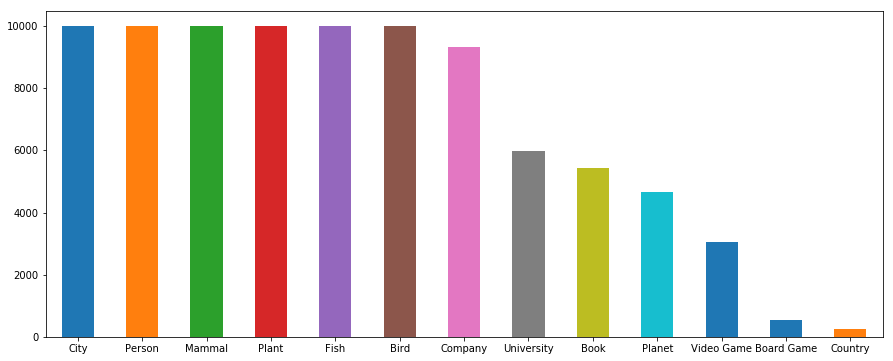

In [8]:
print(len(data))
data.label.value_counts().plot.bar(rot=0,figsize=(15, 6))
plt.show()

Save model

In [9]:
data.to_pickle('abstracts.pkl')